# 1 Loading libraries

In [1]:
import os                             # Library to do things on the filesystem
import pandas as pd                   #  general purpose data handling library
import numpy as np                    #  general purpose data handling library
import scipy as sp
import scipy.stats as stats           # Scipy again
import matplotlib.pyplot as plt       # Standard plotting library


import chart_studio.plotly as py
from IPython.display import display   # A notebook function to display more complex data (like tables)
from math import sqrt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

%matplotlib inline
import seaborn as sns; sns.set()
import statistics

# Choosing global plot styles 
# http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 16

# 2 Reading data - df1 numerical df2 - categorical. Created two csv files 

In [2]:
rawData=pd.read_csv("C:/Users/stomar/OneDrive - Texisle Supply, Inc/Desktop/STomar/Reference/UT-Analytics/C5T3/creditdata.csv")
df=pd.read_csv("C:/Users/stomar/OneDrive - Texisle Supply, Inc/Desktop/STomar/Reference/UT-Analytics/C5T3/creditdata.csv")

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID            30000 non-null int64
LIMIT_BAL     30000 non-null int64
SEX           30000 non-null int64
EDUCATION     30000 non-null int64
MARRIAGE      30000 non-null int64
AGE           30000 non-null int64
Status_Sep    30000 non-null int64
Status_Aug    30000 non-null int64
Status_Jul    30000 non-null int64
Status_Jun    30000 non-null int64
Status_May    30000 non-null int64
Status_Apr    30000 non-null int64
BILL_Sep      30000 non-null int64
BILL_Aug      30000 non-null int64
BILL_Jul      30000 non-null int64
BILL_Jun      30000 non-null int64
BILL_May      30000 non-null int64
BILL_Apr      30000 non-null int64
Paid_Sep      30000 non-null int64
Paid_Aug      30000 non-null int64
Paid_Jul      30000 non-null int64
Paid_Jun      30000 non-null int64
Paid_May      30000 non-null int64
Paid_Apr      30000 non-null int64
Default       30000 non-null int64
dtypes: int64(25

created two excel files one with numbers in category and another one with labers for easier charts and graphs 

# 3 Selecting and Dividing Data

In [4]:
#Select the features
#features
features = rawData.iloc[:,1:24]
print('Summary of feature sample')
features.head().transpose()

Summary of feature sample


,0,1,2,3,4
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
Status_Sep,2,-1,0,0,-1
Status_Aug,2,2,0,0,0
Status_Jul,-1,0,0,0,-1
Status_Jun,-1,0,0,0,0
Status_May,-2,0,0,0,0


In [5]:
#Select the Dependent Variable
depVar = rawData['Default']

In [6]:
#Establish the training set for the features
X_train = (features[: 21000])
X_train.head()
#Dependent Variable Training Set (y Training)
y_train = depVar[: 21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: Default, dtype: int64

In [7]:
#Establish the testing set for the X-Variables or Feature space
#Testing Set (X Testing)
X_test = features[-9000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9000
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  Status_Sep  Status_Aug  \
21000      30000    1          2         1   36           1          -1   
21001     280000    1          3         1   40           2           0   
21002     260000    1          2         1   37           0           0   
21003     200000    1          2         2   32           2           0   
21004      80000    1          2         2   32           2           0   

       Status_Jul  Status_Jun  Status_May  ...  BILL_Jul  BILL_Jun  BILL_May  \
21000          -1          -1           0  ...         0      1170       780   
21001           0           0           0  ...    188411    191291    189029   
21002           0           0           0  ...     21557     23186     14117   
21003           0           0          -2  ...     81890         0         0   
21004           0           0           0  ...     67253     67352     74448   

     

In [8]:
#Establish Ground truth 
#Ground Truth (y_test) 
y_test = depVar[-9000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: Default, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [10]:
X_train.shape, X_test.shape

((15750, 23), (5250, 23))

# 4 Building the models

In [11]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [12]:
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

C:\Users\stomar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\stomar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.11157961 0.10147619 0.08118024]


0.8397904632346955

In [13]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

C:\Users\stomar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\stomar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\stomar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\stomar\AppData\Local\Continuum\anaconda3\lib\site

[-0.0232191  -0.02007272 -0.01782401]


0.930221155776159

In [14]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.12920913 0.12706277 0.10929117]


C:\Users\stomar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.12598690739115148

In [15]:
from sklearn.metrics import classification_report

# 4 Making Predictions

In [16]:
predictionsRF = modelRF.predict(X_test)
rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
predRsquaredRF = r2_score(y_test,predictionsRF)
print('R Squared: %.3f' % predRsquaredRF)
print('RMSE: %.3f' % rmseRF)

R Squared: 0.088
RMSE: 0.396


In [17]:
predictionsSVR = modelSVR.predict(X_test)
rmseSVR = sqrt(mean_squared_error(y_test, predictionsSVR))
predRsquaredSVR = r2_score(y_test,predictionsSVR)
print('R Squared: %.3f' % predRsquaredSVR)
print('RMSE: %.3f' % rmseSVR)

R Squared: -0.029
RMSE: 0.421


In [18]:
predictionsLR = modelLR.predict(X_test)
rmseLR = sqrt(mean_squared_error(y_test, predictionsLR))
predRsquaredLR = r2_score(y_test,predictionsLR)
print('R Squared: %.3f' % predRsquaredLR)
print('RMSE: %.3f' % rmseLR)

R Squared: 0.116
RMSE: 0.390


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


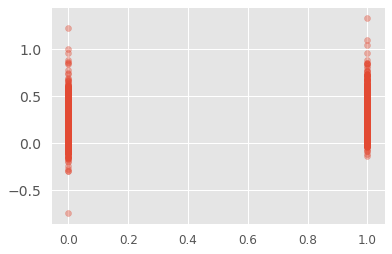

In [19]:
import matplotlib.pyplot
matplotlib.pyplot.scatter(y_test, predictionsLR,alpha = 0.4)


# 5 Improving the results by data wrangling 

In [20]:
# Rename some columns
df = df.rename(columns={
    'LIMIT_BAL': 'LB','Default': 'Z_Default'})
df.head()
df.head().transpose()

,0,1,2,3,4
ID,1,2,3,4,5
LB,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
Status_Sep,2,-1,0,0,-1
Status_Aug,2,2,0,0,0
Status_Jul,-1,0,0,0,-1
Status_Jun,-1,0,0,0,0


In [21]:
#find unique  values 
print('SEX ' + str(sorted(df['SEX'].unique())))
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))
print('Status_1 ' + str(sorted(df['Status_1'].unique())))
print('Z_Default' + str(sorted(df['Z_Default'].unique())))

SEX [1, 2]
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3]


KeyError: 'Status_1'

The above shows the unique values for each category. 0,4,5,6 are all others in Education - so good to combine. 

In [ ]:
# Merging some types as not unique
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4

print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

In [ ]:
# Removing/Adding new columns 

In [ ]:
# ID is not useful so dropped 
drop_cols=['ID']
df=df.drop(drop_cols,axis=1)

In [ ]:
df.shape

In [ ]:
# Adding a new col as difference of Payments and Bill
for i in range(1,7):
    df[ "Diff_P-B_" + str( i )]  = (df["PAID_"  + str( i )])-(df["BILL_"  + str( i )])

In [ ]:
#calc log of BILL 
for i in range(1,7):
    df[ "log_BILL_" + str( i )]  = df["BILL_"  + str( i )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
 


In [ ]:
#calc log of Paid 
for i in range(1,7):
    df[ "log_PAID_" + str( i )]  = df["PAID_"  + str( i )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    


In [ ]:
# calc log of diff
for i in range(1,7):
    df[ "log_Diff_P-B_" + str( i )]  = df["Diff_P-B_"  + str( i )].apply( lambda x: np.log1p(x) if (x>0) else 0 )

In [ ]:
header = df.dtypes.index
print(header)

In [ ]:
df.describe().transpose()

In [ ]:
# Define  bins
mybins_Age = range(0, df.AGE.max(), 10)

# Cut the data with the help of the bins
df['Age_bucket'] = pd.cut(df.AGE, bins=mybins_Age)

# Count the number of values per bucket
df['Age_bucket'].value_counts()

In [ ]:
df.LB = df.LB.astype(int)

In [ ]:
# Define your own bins
mybins_LB = range(0, df.LB.max(), 100)

# Cut the data with the help of the bins
df['LB_bucket'] = pd.cut(df.LB, bins=mybins_LB)

# Count the number of values per bucket
df['LB_bucket'].value_counts()

In [ ]:
df.describe().transpose()

In [ ]:
df.shape

In [ ]:
header = df.dtypes.index
print(header)

In [ ]:
dummies_Sex = pd.get_dummies(df['SEX'], prefix = 'Sex')
cols_Sex =['Sex_' + str(x) for x in range(1, 3)]
print (cols_Sex)
dummies_Sex = dummies_Sex.reindex(columns = cols_Sex, fill_value=0)
dummies_Ed = pd.get_dummies(df['EDUCATION'], prefix = 'Ed')
cols_Ed =['Ed_' + str(x) for x in range(1, 5)]
print (cols_Ed)
dummies_Ed = dummies_Ed.reindex(columns = cols_Ed, fill_value=0)
dummies_Mg = pd.get_dummies(df['MARRIAGE'], prefix = 'Mg')
cols_Mg =['Mg_' + str(x) for x in range(1, 5)]
print (cols_Mg)
dummies_Mg = dummies_Mg.reindex(columns = cols_Mg, fill_value=0)
dfm = pd.concat([df, dummies_Ed,dummies_Sex,dummies_Mg], axis=1)
print (dfm)

In [ ]:
header = dfm.dtypes.index
print(header)

In [ ]:
df_new1 = dfm[['Status_6', 'Status_5',
       'Status_4', 'Status_3', 'Status_2', 'Status_1',   'log_BILL_1',
       'log_BILL_2', 'log_BILL_3', 'log_BILL_4', 'log_BILL_5', 'log_BILL_6',
       'log_PAID_1', 'log_PAID_2', 'log_PAID_3', 'log_PAID_4', 'log_PAID_5',
       'log_PAID_6', 'log_Diff_P-B_1', 'log_Diff_P-B_2', 'log_Diff_P-B_3',
       'log_Diff_P-B_4', 'log_Diff_P-B_5', 'log_Diff_P-B_6' ,'Z_Default']]

In [ ]:
df_new1.info()

In [ ]:
df_new1.describe().transpose()

In [ ]:
df_new2 = dfm[[ 'AGE',
       'LB', 'Ed_1', 'Ed_2', 'Ed_3', 'Ed_4', 'Sex_1', 'Sex_2', 'Mg_1', 'Mg_2',
       'Mg_3', 'Mg_4' ,'Z_Default']]

In [ ]:
df_new2.describe().transpose()

# 6 Applying model building and predictions to new data set 

In [ ]:
#Select the features
#features1
features1 = df_new1.iloc[:,0:24]
print('Summary of feature sample')
features1.head().transpose()


In [ ]:
#features2
features2 = df_new2.iloc[:,0:12]
print('Summary of feature sample')
features2.head().transpose()

In [ ]:
#Select the Dependent Variable
depVar1 = df_new1['Z_Default']
depVar2 = df_new2['Z_Default']

In [ ]:
#Establish the training set for the features
X1_train = (features1[: 21000])
X1_train.head()
#Dependent Variable Training Set (y Training)
y1_train = depVar1[: 21000]
y1_train_count = len(y1_train.index)
print('The number of observations in the Y training set are:',str(y1_train_count))
y1_train.head()

In [ ]:
#Establish the training set for the features
X2_train = (features2[: 21000])
X2_train.head()
#Dependent Variable Training Set (y Training)
y2_train = depVar2[: 21000]
y2_train_count = len(y2_train.index)
print('The number of observations in the Y training set are:',str(y2_train_count))
y2_train.head()

In [ ]:
#Establish the testing set for the X-Variables or Feature space
#Testing Set (X Testing)
X1_test = features1[-9000:]
X1_test_count = len(X1_test.index)
print('The number of observations in the feature testing set is:',str(X1_test_count))
print(X1_test.head())
#Testing Set (X Testing)
X2_test = features2[-9000:]
X2_test_count = len(X2_test.index)
print('The number of observations in the feature testing set is:',str(X2_test_count))
print(X2_test.head())

In [ ]:
#Establish Ground truth 
#Ground Truth (y_test) 
y1_test = depVar1[-9000:]
y1_test_count = len(y1_test.index)
print('The number of observations in the Y training set are:',str(y1_test_count))
y1_test.head()

In [ ]:
y2_test = depVar2[-9000:]
y2_test_count = len(y2_test.index)
print('The number of observations in the Y training set are:',str(y2_test_count))
y2_test.head()

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_train, y1_train)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_train, y2_train)

In [ ]:
X1_train.shape, X1_test.shape

In [ ]:
X2_train.shape, X2_test.shape

In [ ]:
modelSVR1 = SVR()
modelRF1 = RandomForestRegressor()
modelLR1 = LinearRegression()
modelSVR2 = SVR()
modelRF2 = RandomForestRegressor()
modelLR2 = LinearRegression()

In [ ]:
modelRF1.fit(X1_train,y1_train)
print(cross_val_score(modelRF1, X1_train, y1_train))
modelRF1.score(X1_train,y1_train)



In [ ]:
modelRF2.fit(X2_train,y2_train)
print(cross_val_score(modelRF2, X2_train, y2_train))
modelRF2.score(X2_train,y2_train)

In [ ]:
modelSVR1.fit(X1_train,y1_train)
print(cross_val_score(modelSVR1, X1_train, y1_train)) 
modelSVR1.score(X1_train,y1_train)

In [ ]:
modelSVR2.fit(X2_train,y2_train)
print(cross_val_score(modelSVR2, X2_train, y2_train)) 
modelSVR2.score(X2_train,y2_train)

In [ ]:
modelLR1.fit(X1_train,y1_train)
print(cross_val_score(modelLR1, X1_train, y1_train)) 
modelLR1.score(X1_train,y1_train)

In [ ]:
modelLR2.fit(X2_train,y2_train)
print(cross_val_score(modelLR2, X2_train, y2_train)) 
modelLR2.score(X2_train,y2_train)

In [ ]:
predictionsRF = modelRF.predict(X_test)
rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
predRsquaredRF = r2_score(y_test,predictionsRF)
print('R Squared: %.3f' % predRsquaredRF)
print('RMSE: %.3f' % rmseRF)

In [ ]:
predictionsRF1 = modelRF1.predict(X1_test)
rmseRF1 = sqrt(mean_squared_error(y1_test, predictionsRF1))
predRsquaredRF1 = r2_score(y1_test,predictionsRF1)
print('R Squared1: %.3f' % predRsquaredRF1)
print('RMSE1: %.3f' % rmseRF1)

In [ ]:
predictionsRF2 = modelRF2.predict(X2_test)
rmseRF2 = sqrt(mean_squared_error(y2_test, predictionsRF2))
predRsquaredRF2 = r2_score(y2_test,predictionsRF2)
print('R Squared2: %.3f' % predRsquaredRF2)
print('RMSE2: %.3f' % rmseRF2)

In [ ]:
predictionsSVR = modelSVR.predict(X_test)
rmseSVR = sqrt(mean_squared_error(y_test, predictionsSVR))
predRsquaredSVR = r2_score(y_test,predictionsSVR)
print('R Squared: %.3f' % predRsquaredSVR)
print('RMSE: %.3f' % rmseSVR)

In [ ]:
predictionsSVR1 = modelSVR1.predict(X1_test)
rmseSVR1 = sqrt(mean_squared_error(y1_test, predictionsSVR1))
predRsquaredSVR1 = r2_score(y1_test,predictionsSVR1)
print('R Squared1: %.3f' % predRsquaredSVR1)
print('RMSE1: %.3f' % rmseSVR1)

In [ ]:
predictionsSVR2 = modelSVR2.predict(X2_test)
rmseSVR2 = sqrt(mean_squared_error(y2_test, predictionsSVR2))
predRsquaredSVR2 = r2_score(y2_test,predictionsSVR2)
print('R Squared2: %.3f' % predRsquaredSVR2)
print('RMSE2: %.3f' % rmseSVR2)

In [ ]:
predictionsLR = modelLR.predict(X_test)
rmseLR = sqrt(mean_squared_error(y_test, predictionsLR))
predRsquaredLR = r2_score(y_test,predictionsLR)
print('R Squared: %.3f' % predRsquaredLR)
print('RMSE: %.3f' % rmseLR)

In [ ]:
predictionsLR1 = modelLR1.predict(X1_test)
rmseLR1 = sqrt(mean_squared_error(y1_test, predictionsLR1))
predRsquaredLR1 = r2_score(y1_test,predictionsLR1)
print('R Squared1: %.3f' % predRsquaredLR1)
print('RMSE1: %.3f' % rmseLR1)

In [ ]:
predictionsLR2 = modelLR2.predict(X2_test)
rmseLR2 = sqrt(mean_squared_error(y2_test, predictionsLR2))
predRsquaredLR2 = r2_score(y2_test,predictionsLR2)
print('R Squared2: %.3f' % predRsquaredLR2)
print('RMSE2: %.3f' % rmseLR2)